Import and Function:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import random
import itertools
from IPython.display import clear_output

In [2]:
def sharpe(df):
    
    len_tab=len(df)

    ret_lis= list(df["PNL"])
    
    ret_lis=[]
    for i in range(0,len_tab-1):
        ret= ((df["PNL"].values[i+1]/df["PNL"].values[i])-1)
        ret_lis.append(ret)
    
    fir_tra_day=df["PNL"].values[0]
    las_tra_day=df["PNL"].values[len_tab-1]
    
    holding_ret= (las_tra_day-fir_tra_day)/1000000
    
    ret_arr=np.array(ret_lis)    

    std_ret=ret_arr.std()
    mean_ret=np.mean(ret_arr)
    
    cal_an_lis=[]
    for ret in ret_lis:
        cal_an_lis.append(ret+1)
    
    ite = np.array(cal_an_lis)
    geo_mean = (ite.prod()**(1.0/len(ite)) - 1)

    sharpe= holding_ret/len(df)
    
    day_lis=list(day)
    
    day_lis.pop(0)
    
    ret_df= pd.DataFrame({"Ngày":day_lis,"PNL":ret_lis})
    
    
        
    return sharpe

In [3]:
def sharpe2(df):
    global ret_df
    
    day=df["Ngày"]
    
    len_tab=len(df)

    ret_lis= list(df["PNL"])
    
    ret_lis=[]
    for i in range(0,len_tab-1):
        ret= ((df["PNL"].values[i+1]/df["PNL"].values[i])-1)
        ret_lis.append(ret)
    
    fir_tra_day=df["PNL"].values[0]
    las_tra_day=df["PNL"].values[len_tab-1]
    
    holding_ret= (las_tra_day-fir_tra_day)/fir_tra_day
    
    ret_arr=np.array(ret_lis)    

    std_ret=ret_arr.std()
    mean_ret=np.mean(ret_arr)
    
    cal_an_lis=[]
    for ret in ret_lis:
        cal_an_lis.append(ret+1)
    
    ite = np.array(cal_an_lis)
    geo_mean = (ite.prod()**(1.0/len(ite)) - 1)

    sharpe= geo_mean/std_ret
    
    day_lis=list(day)
    
    day_lis.pop(0)
    
    ret_df= pd.DataFrame({"Ngày":day_lis,"PNL":ret_lis})
    
    return sharpe

In [4]:
def get_top_liquid(data_liquid_tab,top):
    data_vol2=data_liquid_tab.drop(columns='Ngày')
    data_vol2=data_vol2.drop(columns='KSC')
    data_vol2=data_vol2.drop(columns='D26')
    unna_vol=data_vol2.apply(lambda x: x.fillna(x.mean()),axis=0)
    unna_vol_pos=unna_vol.mean()
    unna_vol_pos.sort_values(ascending=False, inplace=True)
    most_liquid=unna_vol_pos.keys()[0:top].values
    return most_liquid

In [5]:
def cal_core_pnl(prop_tab,price_tab,innit_mon,looper):
    
    trial=(prop_tab.loc[[looper]]*innit_mon)
    trial2=1/(price_tab.loc[[looper]])

    num=pd.concat([trial, trial2], ignore_index=True).prod()

    resl = np.sum((price_tab.loc[looper+1]*num-price_tab.loc[looper]*num))
    
    return resl  

In [6]:
def cal_daily_pnl(prop_tab,price_tab,innit_mon):
    
    pnl_tab=[]
    for i in range(len(prop_tab)-1):
        daily_pnl=cal_core_pnl(prop_tab,matching_day_price_tab,innit_mon,i)
        pnl_tab.append(daily_pnl)
        innit_mon += daily_pnl
    
    return pnl_tab

In [7]:
def cal_cum_pnl(daily_pnl):
    cum_pnl=[]
    cum_pnl.append(daily_pnl[0]+10000)
    for i in range(1,len(daily_pnl)):
        cum_pnl.append(daily_pnl[i]+cum_pnl[i-1])
        
    lis=[10000]
    for thing in cum_pnl:
        lis.append(thing)
   
    cum_pnl1=lis
    for i in range(len(cum_pnl1)):
        cum_pnl1[i]=(cum_pnl1[i]-10000)*1000
        
    return cum_pnl1

In [8]:
def cal_tot_money(cummul_pnl):
    
    tot_money=[]
    
    for thing in cummul_pnl:
        tot_money.append(thing+10000000)
    
    return tot_money

In [9]:
def get_date(date_data,len_pnl_data):
#     day=data1["Ngày"]
    day=date_data.to_list()
    to_del= len(day) - len_pnl_data - 1
#     A=day[to_del-1]
    del day[0:to_del]    
    return day

In [10]:
def creat_pnl_df(cummul_pnl,date_table):
    data_to_draw = pd.DataFrame({"PNL":cummul_pnl,"Ngày":date_table})
    return data_to_draw

In [11]:
def cal_proprtion(input_tab):
    result=input_tab.div(input_tab.abs().sum(axis=1), axis=0)
    result.dropna(inplace=True)
    result.reset_index(drop=True,inplace=True)
    return result

In [72]:
def get_T2_trading(prop_tab):
    global use1
    
    for i in range(0,len(prop_tab),3):
        
        if i <= len(prop_tab) - 3:
            prop_tab.loc[i+1]=prop_tab.loc[i]
            prop_tab.loc[i+2]=prop_tab.loc[i]
        
        elif i == len(prop_tab) - 2:
            prop_tab.loc[i+1]=prop_tab.loc[i]
        
        else:
            pass   
            
    use1=1
    
    return prop_tab

In [13]:
def get_matching_price_tab(orig_price_tab,len_prop_tab,data_liquid_tab,top_liquid):
    to_del= len(orig_price_tab)-len_prop_tab
    delet_lis=[]
    for i in range(to_del):
        delet_lis.append(i)
    matching_day_price_tab=orig_price_tab[get_top_liquid(data_liquid_tab,top_liquid)].drop(axis=0, index= delet_lis)
    matching_day_price_tab.reset_index(drop=True,inplace=True)
    return matching_day_price_tab

In [14]:
def MA(price_tab,time_period,data_liquid_tab,top_liquid):
    MA=price_tab[get_top_liquid(data_liquid_tab,top_liquid)].rolling(window=time_period).mean()
    return MA

In [15]:
def ts_delta(price_tab,time_period,data_liquid_tab,top_liquid):
    delta=price_tab[get_top_liquid(data_liquid_tab,top_liquid)].diff(periods=time_period)
    return delta

In [16]:
def no_short_condition(input_tab):
    global use2
    
    input_tab[input_tab<0]=0
    
    use2=1
    return input_tab

In [41]:
def ts_rank(price_tab,data_liquid_tab,top_liquid):
    result=price_tab[get_top_liquid(data_liquid_tab,top_liquid)].rank(pct=True)
    return result

In [42]:
def group_rank(price_tab,data_liquid_tab,top_liquid):
    result=price_tab[get_top_liquid(data_liquid_tab,top_liquid)].rank(axis=1,pct=True)
    return result

Data Input:

In [19]:
data_vol=pd.read_excel("./Summary/Volume.xlsx")
data_vol.drop(columns='Unnamed: 0',inplace=True) 

In [20]:
data_close=pd.read_excel("./Summary/Close.xlsx")
data_close.drop(columns='Unnamed: 0',inplace=True)

In [21]:
data_close2=data_close.drop(columns='Ngày')
data_close2=data_close2.drop(columns='KSC')
data_close2=data_close2.drop(columns='D26')

In [27]:
close=data_close2.fillna(method="bfill")

In [28]:
data_open=pd.read_excel("./Summary/Open.xlsx")
data_open.drop(columns='Unnamed: 0',inplace=True)

In [29]:
data_open2=data_open.drop(columns='Ngày')
data_open2=data_open2.drop(columns='KSC')
data_open2=data_open2.drop(columns='D26')

In [30]:
openn=data_open2.fillna(method="bfill")

In [31]:
data_high=pd.read_excel("./Summary/High.xlsx")
data_high.drop(columns='Unnamed: 0',inplace=True)

In [32]:
data_high2=data_high.drop(columns='Ngày')
data_high2=data_high2.drop(columns='KSC')
data_high2=data_high2.drop(columns='D26')

In [35]:
high=data_high2.fillna(method="bfill")

In [34]:
data_low=pd.read_excel("./Summary/Low.xlsx")
data_low.drop(columns='Unnamed: 0',inplace=True)

In [36]:
data_low2=data_low.drop(columns='Ngày')
data_low2=data_low2.drop(columns='KSC')
data_low2=data_low2.drop(columns='D26')

In [37]:
low=data_low2.fillna(method="bfill")

Setting:

In [38]:
top_liquid_to_run=20

Calculate Propotion:

In [127]:
stra = ts_delta(close,5,data_vol,top_liquid_to_run)

str_stra = "ts_delta(ts_rank(close),10)"


res=cal_proprtion(stra)

In [128]:
res = get_T2_trading(res)

try:
    if use1==1:
        trade="_T2"
    else:
        trade=""
except:
    trade=""

In [129]:
res=no_short_condition(res)

try:
    if use2==1:
        short="_without_short"
    else:
        short=""
except:
    short=""

In [140]:
matching_day_price_tab= get_matching_price_tab(close.shift(-1),len(res),data_vol,top_liquid_to_run)

In [142]:
matching_day_price_tab.drop(742,axis=0)
res.drop(742,axis=0)

,FLC,SHB,ROS,STB,HQC,HPG,HAG,MBB,CTG,PVS,ITA,SCR,HSG,SSI,ASM,VPB,DXG,OGC,PVD,KBC
0,0.000000,0.016287,0.394137,0.034202,0.000000,0.000000,0.000000,0.0,0.120521,0.109121,0.026059,0.008143,0.000000,0.043974,0.032573,0.000000,0.022801,0.000000,0.058632,0.045603
1,0.000000,0.016287,0.394137,0.034202,0.000000,0.000000,0.000000,0.0,0.120521,0.109121,0.026059,0.008143,0.000000,0.043974,0.032573,0.000000,0.022801,0.000000,0.058632,0.045603
2,0.000000,0.016287,0.394137,0.034202,0.000000,0.000000,0.000000,0.0,0.120521,0.109121,0.026059,0.008143,0.000000,0.043974,0.032573,0.000000,0.022801,0.000000,0.058632,0.045603
3,0.000000,0.000000,0.538618,0.034553,0.000000,0.000000,0.000000,0.0,0.121951,0.016260,0.000000,0.000000,0.000000,0.036585,0.000000,0.000000,0.000000,0.010163,0.000000,0.000000
4,0.000000,0.000000,0.538618,0.034553,0.000000,0.000000,0.000000,0.0,0.121951,0.016260,0.000000,0.000000,0.000000,0.036585,0.000000,0.000000,0.000000,0.010163,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,0.035556,0.014815,0.000000,0.000000,0.025185,0.000000,0.001481,0.0,0.000000,0.133333,0.001481,0.000000,0.000000,0.000000,0.035556,0.000000,0.000000,0.000000,0.044444,0.081481
738,0.038760,0.000000,0.000000,0.031008,0.005814,0.116279,0.000000,0.0,0.087209,0.000000,0.021318,0.112403,0.005814,0.000000,0.000000,0.058140,0.019380,0.000000,0.000000,0.135659
739,0.038760,0.000000,0.000000,0.031008,0.005814,0.116279,0.000000,0.0,0.087209,0.000000,0.021318,0.112403,0.005814,0.000000,0.000000,0.058140,0.019380,0.000000,0.000000,0.135659
740,0.038760,0.000000,0.000000,0.031008,0.005814,0.116279,0.000000,0.0,0.087209,0.000000,0.021318,0.112403,0.005814,0.000000,0.000000,0.058140,0.019380,0.000000,0.000000,0.135659


Calculate PNL:

In [143]:
innit_money=10000

pnl_tab = cal_daily_pnl(res,matching_day_price_tab,innit_money)
pnl_tab

[22.422246729343286,
 -12.275110227159459,
 -35.71008503210332,
 143.0286632891531,
 19.839116478447906,
 67.0664779847675,
 33.95875128525967,
 39.338830684667535,
 46.75936476606906,
 56.812529147623756,
 72.66918986587105,
 -4.667307812345655,
 101.50970863323968,
 56.520776287759475,
 13.087845900371633,
 32.57148418314089,
 85.13313729579089,
 200.57208665958217,
 64.08524088902247,
 42.59898396591511,
 6.268803736747003,
 62.23227757467213,
 186.48923686562085,
 61.78480929173959,
 34.910143661658964,
 52.47319687490108,
 -126.26546082818115,
 140.11274492843813,
 -5.825902692274838,
 -34.90443494363913,
 -69.17306316188109,
 -39.67795964379778,
 371.9067747267994,
 114.32544843039679,
 -17.097598037635805,
 70.6938471297473,
 111.93952871423704,
 68.48356722851798,
 106.50224602207534,
 84.33324112081783,
 -216.14671270119555,
 -525.9672069432092,
 -168.73598263912618,
 44.06899710727343,
 -9.644693332970775,
 43.19920526533584,
 13.924802859644373,
 33.04118178759166,
 -89.7609

In [144]:
cum_pnl=cal_cum_pnl(pnl_tab)
len(cum_pnl)

743

In [145]:
total_money=cal_tot_money(cum_pnl)
len(total_money)

743

In [146]:
day=get_date(data_close["Ngày"],len(pnl_tab))
len(day)

743

In [147]:
data_to_draw=creat_pnl_df(cum_pnl,day)

In [148]:
data_to_sharpe=creat_pnl_df(total_money,day)

Calculate Sharpe:

In [149]:
A=sharpe2(data_to_sharpe)

Draw PNL Chart:

0.026727542568434202


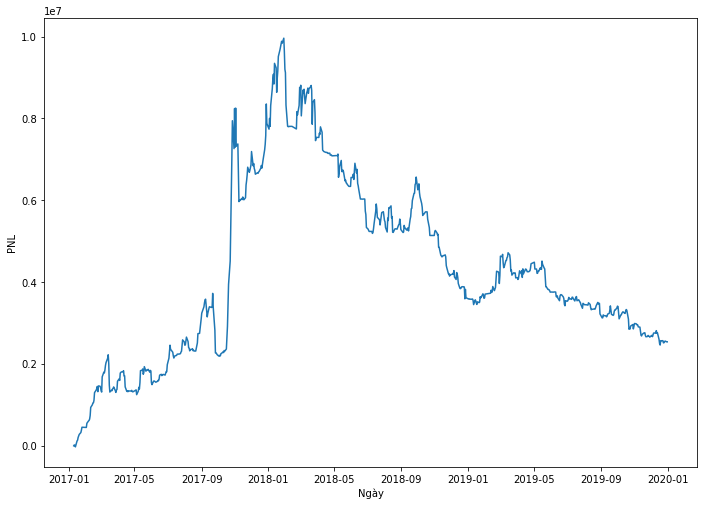

In [150]:
fig, ax = plt.subplots()     
fig.set_size_inches(11.7, 8.27)
sns.lineplot(x='Ngày',y='PNL', data = data_to_draw,ax = ax,sort=False)

if A>=0.2:
    plt.savefig("./Strategy/Passed/IMG/%s%s%s_top%s.png"%(str_stra,short,trade,top_liquid_to_run))
    print(A)
else:
    print(A)

In [57]:
res["Ngày"]=day
res.to_excel("./Strategy/Passed/Text/%s%s%s_top%s.xlsx"%(str_stra,short,trade,top_liquid_to_run))